# [機械学習 〜 K−近傍法 〜](https://qiita.com/fujin/items/128ed7188f7e7df74f2c)

## k近傍法とは？

* 通称 K-NN（K-Nearest Neighbor Algorithm の略称）
* 特徴空間上において、近くにある K個 オブジェクトのうち、最も一般的なクラスに分類する。
* 距離の算出には、一般的にユークリッド距離が使われる。（他にマンハッタン距離などがある）
* 次元の呪いのため、高次元データには向かない。
* トレーニングデータ数・特徴量が増えると予測が遅くなる。
* クラス分類や回帰分析に利用可能

## Scikit-learn によるクラス分類

[sklearn.neighbors.KNeighborsClassifier¶](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)を使います。

## ライブラリとデータセットの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# アヤメデータセット読み込み
from sklearn.datasets import load_iris
iris = load_iris()

# 特徴量
X = iris.data
# 目的変数
Y = iris.target

In [2]:
# データ表示（特徴量）
print("データ数 = %d  特徴量 = %d" % (X.shape[0], X.shape[1]))
pd.DataFrame(X, columns=iris.feature_names).head()

データ数 = 150  特徴量 = 4


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# データ表示（目的変数）
print("データ数 = %d" % (Y.shape[0]))
print(Y)

データ数 = 150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 分類

In [4]:
# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

## 分類予測・精度（最適な k の探索）

[1] score: 0.97
[2] score: 0.97
[3] score: 0.97
[4] score: 0.97
[5] score: 0.97
[6] score: 0.97
[7] score: 0.97
[8] score: 0.97
[9] score: 0.97
[10] score: 0.97
[11] score: 0.97
[12] score: 0.97
[13] score: 0.97
[14] score: 0.97
[15] score: 0.97
[16] score: 0.97
[17] score: 0.97
[18] score: 0.97
[19] score: 0.97
[20] score: 0.97
[21] score: 0.97
[22] score: 0.97
[23] score: 0.97
[24] score: 0.95
[25] score: 0.95
[26] score: 0.95
[27] score: 0.95
[28] score: 0.92
[29] score: 0.89
[30] score: 0.95


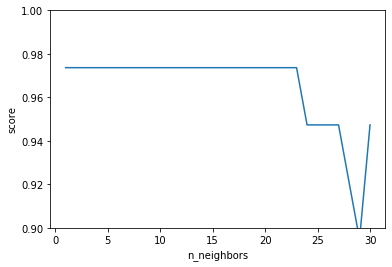

In [9]:
#
# K-近傍法
#
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 31): # K = 1~30
  # KNeighborsClassifier
  knc = KNeighborsClassifier(n_neighbors=k)
  knc.fit(X_train, Y_train)

  # 予測　
  Y_pred = knc.predict(X_test)

  # 評価 R^2
  score = knc.score(X_test, Y_test)
  print("[%d] score: {:.2f}".format(score) % k)

  list_nn.append(k)
  list_score.append(score)

# プロット
plt.ylim(0.9, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

# 乳がんデータの分類

## データ読み込み

In [6]:
# 乳癌データセット
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 特徴量
X = cancer.data
# 目的変数
Y = cancer.target

## 特徴量の表示

In [7]:
# データ表示（特徴量）
print("データ数 = %d  特徴量 = %d" % (X.shape[0], X.shape[1]))
pd.DataFrame(X, columns=cancer.feature_names).head()

データ数 = 569  特徴量 = 30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## ターゲットの表示

In [8]:
# データ表示（目的変数）
print("データ数 = %d" % (Y.shape[0]))
print(Y)

データ数 = 569
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0

## 分類予測・精度（最適な k の探索）

[1] score: 0.92
[2] score: 0.90
[3] score: 0.92
[4] score: 0.92
[5] score: 0.94
[6] score: 0.92
[7] score: 0.94
[8] score: 0.94
[9] score: 0.96
[10] score: 0.94


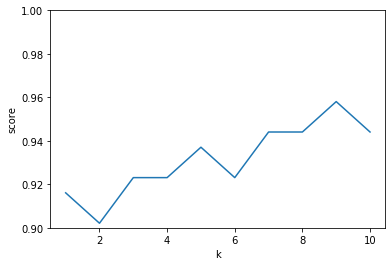

In [10]:
# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

#
# K-最近傍法
#
from sklearn.neighbors import KNeighborsClassifier

list_k = []
list_score = []
for k in range(1, 11):
  # KNeighborsClassifier
  knc = KNeighborsClassifier(n_neighbors=k)
  knc.fit(X_train, Y_train)

  # 予測　
  Y_pred = knc.predict(X_test)

  # 評価 R^2
  score = knc.score(X_test, Y_test)
  print("[%d] score: {:.2f}".format(score) % k)

  list_k.append(k)
  list_score.append(score)

# プロット
plt.ylim(0.9, 1.0)
plt.xlabel("k")
plt.ylabel("score")
plt.plot(list_k, list_score)

# 回帰分析

回帰分析には、[sklearn.neighbors.KNeighborsRegressor¶](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)を使います。

## ボストン住宅価格データの回帰分析

In [19]:
# ボストン住宅価格データセット
from sklearn import datasets
boston = datasets.load_boston()

# 説明変数
X = boston.data
# 目的変数
Y = boston.target

In [20]:
# データ表示（特徴量）
print("データ数 = %d  特徴量 = %d" % (X.shape[0], X.shape[1]))
pd.DataFrame(X, columns=boston.feature_names).head()

データ数 = 506  特徴量 = 13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
# データ表示（目的変数）
print("データ数 = %d" % (Y.shape[0]))
print(Y[:10]) # 先頭 10件表示

データ数 = 506
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


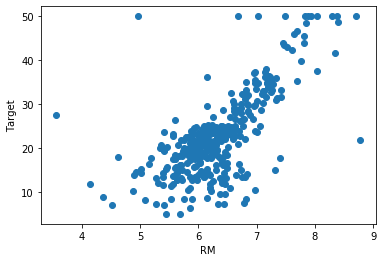

In [24]:
# 説明変数に部屋数のみ使用
X = boston.data[:, [5]] # 部屋数

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# プロット
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_train, Y_train, "o")

[1] MAE = 6.14,  RMSE = 8.72,  score = 0.07
[2] MAE = 4.76,  RMSE = 6.88,  score = 0.42
[3] MAE = 4.56,  RMSE = 6.59,  score = 0.47
[4] MAE = 4.53,  RMSE = 6.46,  score = 0.49
[5] MAE = 4.30,  RMSE = 6.28,  score = 0.52
[6] MAE = 4.27,  RMSE = 6.18,  score = 0.53
[7] MAE = 4.30,  RMSE = 6.16,  score = 0.53
[8] MAE = 4.33,  RMSE = 6.23,  score = 0.52
[9] MAE = 4.33,  RMSE = 6.22,  score = 0.53
[10] MAE = 4.31,  RMSE = 6.20,  score = 0.53
[11] MAE = 4.31,  RMSE = 6.18,  score = 0.53
[12] MAE = 4.25,  RMSE = 6.16,  score = 0.54
[13] MAE = 4.30,  RMSE = 6.19,  score = 0.53
[14] MAE = 4.22,  RMSE = 6.13,  score = 0.54
[15] MAE = 4.21,  RMSE = 6.14,  score = 0.54
[16] MAE = 4.22,  RMSE = 6.15,  score = 0.54
[17] MAE = 4.20,  RMSE = 6.15,  score = 0.54
[18] MAE = 4.15,  RMSE = 6.09,  score = 0.55
[19] MAE = 4.19,  RMSE = 6.14,  score = 0.54
[20] MAE = 4.23,  RMSE = 6.21,  score = 0.53


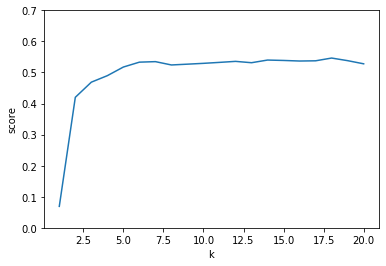

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

list_k = []
list_score = []

for k in range(1, 21):
  # KNeighborsClassifier
  knr = KNeighborsRegressor(n_neighbors=k)
  knr.fit(X_train, Y_train)

  # 予測　
  Y_pred = knr.predict(X_test)

  #
  # 評価
  #
  # 平均絶対誤差(MAE)
  mae = mean_absolute_error(Y_test, Y_pred)
  # 平方根平均二乗誤差（RMSE）
  rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
  # スコア R^2
  score = knr.score(X_test, Y_test)

  print("[%d] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (k, mae, rmse, score))

  list_k.append(k)
  list_score.append(score)


# プロット
plt.ylim(0, 0.7)
plt.xlabel("k")
plt.ylabel("score")
plt.plot(list_k, list_score)

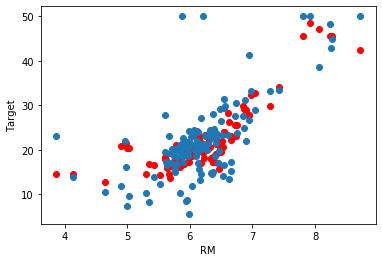

In [36]:
# テストデータ上での正解値（青）と予測値（赤）をプロット
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, Y_train)
Y_pred = knr.predict(X_test)

plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, Y_pred, "ro")
plt.plot(X_test, Y_test, "o")